# PCA и t-SNE или зачем понижать размерность?


Трудности могут возникнуть, если:

 - нужно визуализировать результаты кластеризации, а пространство признаков многомерное.
 - нужно обучить модель, а объект описывается большим количеством признаков. Эти признаки могут быть избыточными или малоинформативными, что приведёт к плохим результатам при обучении модели.

 Избежать этих проблем поможет снижение размерности данных

Методы снижения размерности могут преобразовывать данные двумя способами:

- линейно,
- нелинейно.


PCA применяется следующим образом:
``` python
# из модуля decomposition библиотеки sklearn импортируем класс PCA
from sklearn.decomposition import PCA
# создаём объект класса PCA
# n_components — задаём количество компонентов для проведения трансформации
pca = PCA(n_components=2, random_state=42)
# обучаем модель на данных X
pca.fit(X)
# применяем уменьшение размерности к матрице X
pca.transform(X)

Теперь рассмотрим работу с PCA на практике. Из датасетов sklearn импортируем датасет MNIST — это данные, основанные на рукописном начертании цифр:

Для данного датасета обучим модель, которая по пикселям изображения предсказывает, что за цифра на нём изображена. Первой мы разработаем модель, которая будет учитывать все признаки, а затем уменьшим размерность данных с помощью PCA и ещё раз обучим модель. Далее мы сравним качество полученных моделей и время, которое было затрачено на обучение в каждом случае.

В датасете MNIST представлено 70 000 изображений, каждое из которых описывается 784 признаками.

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [5]:
# загрузим датасет MNIST
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml("mnist_784")
# загрузим признаки в переменную X  
X = dataset['data']
# загрузим «ответы» в переменную y
y = dataset['target']
# разделим данные с помощью sklearn на данные для обучения и теста
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)

# импортируем StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
# трансформируем датасеты train_x и test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# импортируем класс PCA
from sklearn.decomposition import PCA

# создадим объект класса PCA
pca = PCA(n_components=300)
pca.fit(train_x)
# уменьшим размерность данных
train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

c:\Users\Павел\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:91: UserWarning: A network error occurred while downloading https://openml.org/api/v1/json/data/554. Retrying...
  warn(
c:\Users\Павел\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:91: UserWarning: A network error occurred while downloading https://openml.org/api/v1/json/data/qualities/554. Retrying...
  warn(
c:\Users\Павел\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:91: UserWarning: A network error occurred while downloading https://openml.org/data/v1/download/52667. Retrying...
  warn(


In [7]:
# проверим как изменилась размерность
print(len(train_x[0]))
print(len(train_x_pca[0]))

784
300


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# напишем функцию, которая на вход принимает X и y, а возвращает модель и время
def get_time_and_accuracy(train_x, train_y, test_x, test_y):
    # создадим объект класса LogisticRegression
    log_reg_model = LogisticRegression(max_iter=1000)
    from time import time
    # запишем время с начала эпохи в секундах до обучения модели
    start_time = time()
    # обучим модель
    log_reg_model.fit(train_x, train_y)    
    # запишем время с начала эпохи в секундах после обучения
    end_time = time()
    # подсчитаем время, потраченное на обучение модели
    time = end_time-start_time
    # предскажем на тестовых данных
    y_pred = log_reg_model.predict(test_x)
    # посчитаем скор для тестового предсказания
    score = accuracy_score(test_y, y_pred)
    # вернём время, потраченное на обучение, и качество полученной модели
    return time, score

model_pca_time, model_pca_acc = get_time_and_accuracy(train_x_pca, train_y, test_x_pca, test_y)
print(f"Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения {model_pca_time}, метрика модели {model_pca_acc}")
# Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 54.12072825431824, метрика модели 0.9255714285714286

model_time, model_acc = get_time_and_accuracy(train_x, train_y, test_x, test_y)
print(f"Модель, построенная на всех исходных признаках. Время обучения {model_time}, метрика модели {model_acc}")

Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 58.43621802330017, метрика модели 0.9254285714285714
Модель, построенная на всех исходных признаках. Время обучения 127.60087418556213, метрика модели 0.9187142857142857


## t-SNE алгоритм уменьшения размерности для визуализации


In [10]:
# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE

# создаём объект класса TSNE
# n_components — размерность нового пространства
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)

>Теперь попробуем уменьшить размерность и визуализировать пространство пикселей, которые описывают данные рукописного начертания цифр. Сравним, какая визуализация получается при использовании PCA и tSNE.

<AxesSubplot: xlabel='0', ylabel='1'>

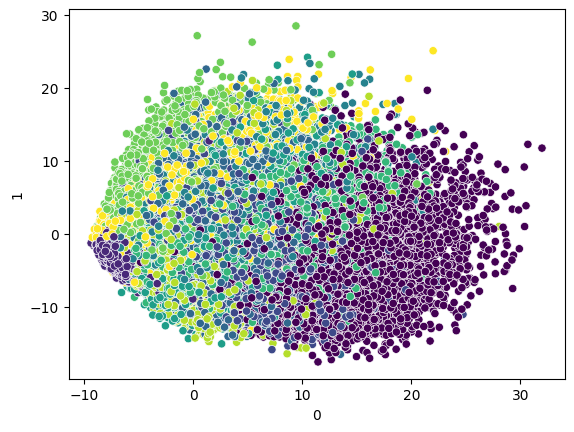

In [11]:
import seaborn as sns

# создадим объект класса PCA, уменьшим размерность данных до 2
pca = PCA(n_components=2, random_state=42)

# уменьшим размерность данных
X_reduced = pca.fit_transform(train_x)
# сохраним данные в датафрейм
df_pca = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_pca['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
# визуализируем
sns.scatterplot(x=df_pca[0], y=df_pca[1], c=df_pca['c'])

c:\Users\Павел\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Павел\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot: xlabel='0', ylabel='1'>

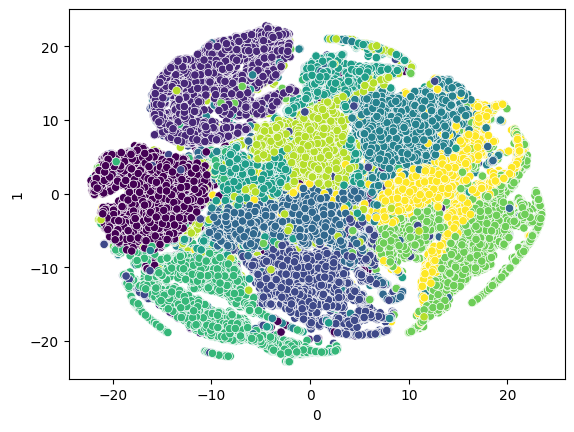

In [12]:
# немного уменьшим количество объектов для уменьшения размерности, иначе алгоритм будет работать очень долго
X_reduced = tsne.fit_transform(train_x)
# сохраним данные в датафрейм
df_tsne = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_tsne['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], c=df_tsne['c'])